In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Importamos todo el dataset de reviews completo
for i in range(1,10):
    if i == 1:
        reviews = pd.read_csv('D:/Marcos/HENRY/Proyecto-Final/reviews_finales/reviews_1.csv',sep=';',escapechar='\\')
    else:
        reviews = pd.concat([reviews,pd.read_csv('D:/Marcos/HENRY/Proyecto-Final/reviews_finales/reviews_'+str(i)+'.csv',
                                                 sep=';',escapechar='\\')],ignore_index=True)
reviews.head()

C:\Users\larra\AppData\Local\Temp\ipykernel_3836\1376262560.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([reviews,pd.read_csv('D:/Marcos/HENRY/Proyecto-Final/reviews_finales/reviews_'+str(i)+'.csv',


,Id_Usuario,Id_Restaurant,Rating,Reseña,Timestamp
0,117975922625527873536.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4,"On the higher end of price for pizza, but they...",1463443013514
1,114316524790614294528.0,0x8889221157fb3455:0x5c125c40c3eccc2a,3,"Food was ok, felt like the atmosphere as well ...",1447623939865
2,113632573920508362752.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4,"Good food, service so so",1469293549247
3,107684037632376815616.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5,Love it,1442279219480
4,112603593315264724992.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5,Yum,1382634896130


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007867 entries, 0 to 16007866
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Id_Usuario     object
 1   Id_Restaurant  object
 2   Rating         int64 
 3   Reseña         object
 4   Timestamp      int64 
dtypes: int64(2), object(3)
memory usage: 610.7+ MB


Para realizar el modelo de Machine Learning no nos interesan ni las reseñas (el texto), ni el momento en el que se hizo la misma (Timestamp). Vamos a descartar estas columnas para trabajar con un dataframe mas liviano.

In [5]:
reviews_ml = reviews.drop(columns=['Reseña','Timestamp'])
reviews_ml.head()

,Id_Usuario,Id_Restaurant,Rating
0,117975922625527873536.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
1,114316524790614294528.0,0x8889221157fb3455:0x5c125c40c3eccc2a,3
2,113632573920508362752.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
3,107684037632376815616.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5
4,112603593315264724992.0,0x8889221157fb3455:0x5c125c40c3eccc2a,5


Vamos a observar las características de los distintos campos

<AxesSubplot: xlabel='Rating', ylabel='count'>

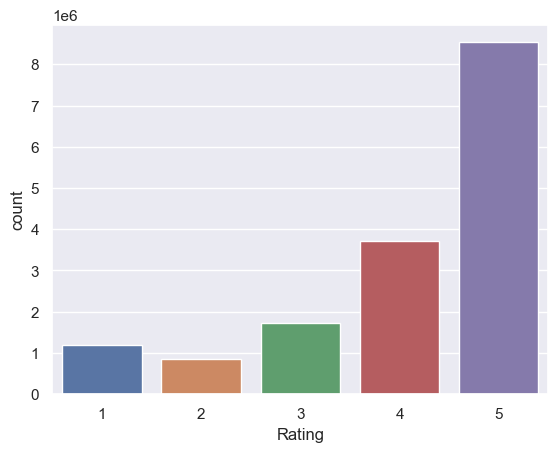

In [6]:
#Vamos a observar como están distribuidas las calificaciones
sns.countplot(data=reviews_ml,x='Rating')

Puede verse que el dataset esta claramente desbalanceado. La suma de las cantidades de todas las otras calificiones (de 1 a 4) no llega a la cantidad de calificación 5. Mientras que la suma de las calificaciones 4 y 5 es mas del triple que de las calificaciones mas bajas (1 a 3). Antes de realizar alguna acción correctiva vamos a seguir explorando.

In [7]:
#Agrupamos las reviews por usuario y contamos cuantas veces voto cada uno
usuarios_agrupados = reviews_ml.groupby(by='Id_Usuario').count().drop(
                                                columns='Id_Restaurant').rename(
                                                    columns={'Rating':'Cantidad'}).sort_values(
                                                                    by='Cantidad',ascending=False).reset_index()
usuarios_agrupados

,Id_Usuario,Cantidad
0,_BcWyKQL16ndpBdggh2kNA,1704
1,-G7Zkl1wIWBBmD0KRy_sCw,1296
2,ET8n-r7glWYqZhuR6GcdNw,1144
3,fr1Hz2acAb3OaL3l6DyKNg,1104
4,1HM81n6n4iPIFU5d2Lokhw,1095
...,...,...
7074742,110142259096190877696.0,1
7074743,110142249937851678720.0,1
7074744,110142248783080914944.0,1
7074745,110142241137163059200.0,1


<AxesSubplot: >

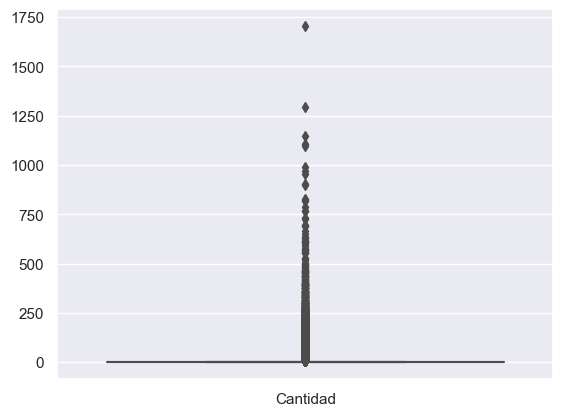

In [8]:
#Visualizamos estas cantidades
sns.boxplot(data=usuarios_agrupados)

(0.0, 5.0)

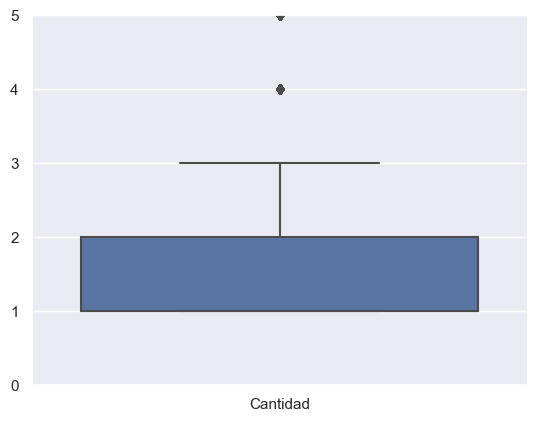

In [9]:
#Nos acercamos a la media
sns.boxplot(data=usuarios_agrupados)
plt.ylim(0,5)

In [10]:
usuarios_agrupados[usuarios_agrupados['Cantidad']==1].shape

(3912759, 2)

Vemos que son demasiados los usuarios (casi 4 millones) que nos dan demasiada poca información ya que votaron una única vez. Igual que con el desbalanceo vamos a esperar a terminar de analizar el resto del dataset antes de hacer alguna acción correctiva.

In [11]:
#Agrupamos las reviews por restaurant y contamos cuantos votos tiene cada uno
restaurants_agrupados = reviews_ml.groupby(by='Id_Restaurant').count().drop(
                                                columns='Id_Usuario').rename(
                                                    columns={'Rating':'Cantidad'}).sort_values(
                                                                    by='Cantidad',ascending=False).reset_index()
restaurants_agrupados

,Id_Restaurant,Cantidad
0,0x8620a60c5d5e55d3:0x73c7b3c06a67a923,9057
1,ac1AeYqs8Z4_e2X5M3if2A,7508
2,0x40771e59f0513085:0x513683476a2005d8,7148
3,GXFMD0Z4jEVZBCsbPf4CTQ,6149
4,ytynqOUb3hjKeJfRj5Tshw,5770
...,...,...
171414,4QdZHOqo7OI63SG6JnLdpg,5
171415,4Qt-KtFm3AJOJnrk61_7JQ,5
171416,i0b_xiKIbExKtF3vqo1Bzw,5
171417,bfVvm2RsdDW8AReCM9ii8A,5


<AxesSubplot: >

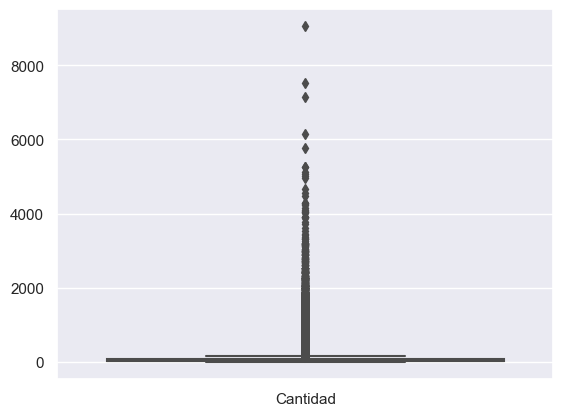

In [12]:
#Visualizamos estas cantidades
sns.boxplot(data=restaurants_agrupados)

(0.0, 200.0)

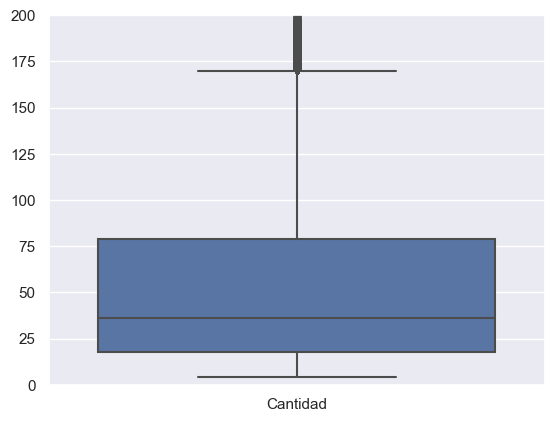

In [13]:
#Nos acercamos
sns.boxplot(data=restaurants_agrupados)
plt.ylim(0,200)

Se ven grandes outliers con restaurants que recibieron una gran cantidad de reseñas y una gran cantidad que recibieron 4 o 5 reseñas. Al no estar comparando items si no que vamos a comparar usuarios y vamos a hacer perfiles de estos, el hecho de que algún restaurant tenga muchas reseñas o pocas no interfiere con el aprendizaje.

Naturalmente, los restaurants con muchas reseñas van a ser más veces recomendados que los otros pero esto no es un problema si no una salida natural a este problema.

Por lo tanto, los restaurants vamos a dejarlos así. Sin embargo, para los usuarios que nos dieron tan poca información es dificil armarle un perfil y esto traerá grandes errores en el modelo de ML. Debemos eliminarlos para evitarlos.

In [14]:
#Vemos cuantos usuarios votaron menos de 5 veces
print('Usuarios con menos de 5 votos: ',usuarios_agrupados[usuarios_agrupados['Cantidad']<5].shape[0])
print('Porcentaje del total: ',
      round(100*usuarios_agrupados[usuarios_agrupados['Cantidad']<5].shape[0]/usuarios_agrupados.shape[0],2),'%')

Usuarios con menos de 5 votos:  6489767
Porcentaje del total:  91.73 %


Si establecemos un minimo de 5 votos para poder armar un perfil de usuario como para recomendar debemos descartar más del 90% de los usuarios. Esto no quiere decir que se descartará más del 90% del dataset pero si se va a descartar al menos la mitad del mismo. Todo esto se realiza en pos de un buen funcionamiento del modelo.

In [15]:
reviews_ml_filt = reviews_ml[~reviews_ml['Id_Usuario'].isin(usuarios_agrupados[
                                                usuarios_agrupados['Cantidad']<5]['Id_Usuario'].values)].reset_index(drop=True)
reviews_ml_filt

,Id_Usuario,Id_Restaurant,Rating
0,117975922625527873536.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
1,114316524790614294528.0,0x8889221157fb3455:0x5c125c40c3eccc2a,3
2,113632573920508362752.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
3,112306828115616432128.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
4,103339320723516751872.0,0x8889221157fb3455:0x5c125c40c3eccc2a,4
...,...,...,...
5563206,x1QLCwZGFAjxRRw4EHc3-g,0x87d8b57145b738eb:0x88933c8099aada0,5
5563207,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5
5563208,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4
5563209,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5


<AxesSubplot: xlabel='Rating', ylabel='count'>

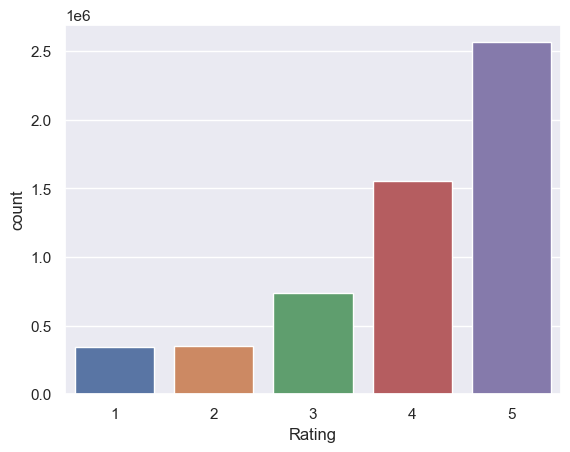

In [16]:
#Se descartó mas de 2/3 del dataset. Vamos a ver si la distribución de las calificaciones cambió
sns.countplot(data=reviews_ml_filt,x='Rating')

Se ve que cambió bastante. La diferencia entre las calificaciones de 5 y las demás ya no es tan grande. Igualmente sigue considerablemente desbalanceado pero así se va a trabajar.

In [17]:
#Exportamos
reviews_ml_filt.to_csv('reviews_finales/reviews_ml.csv')

Presentamos un breve resumen a continuación.

In [23]:
print('Cantidad de restaurants antes de quitar los usuarios que votaron poco: ',reviews_ml['Id_Restaurant'].unique().size)
print('Cantidad de restaurants luego de quitar los usuarios que votaron poco: ',reviews_ml_filt['Id_Restaurant'].unique().size)

Cantidad de restaurants antes de quitar los usuarios que votaron poco:  171419
Cantidad de restaurants luego de quitar los usuarios que votaron poco:  169261


In [24]:
print('Cantidad de usuarios antes de quitar los que votaron poco: ',reviews_ml['Id_Usuario'].unique().size)
print('Cantidad de usuarios luego de quitar los que votaron poco: ',reviews_ml_filt['Id_Usuario'].unique().size)

Cantidad de usuarios antes de quitar los que votaron poco:  7074747
Cantidad de usuarios luego de quitar los que votaron poco:  584980


In [27]:
print('Cantidad de reviews antes de quitar los usuarios que votaron poco:')
print(reviews_ml.shape[0])
print('Distribucion:')
print('5: ',reviews_ml[reviews_ml['Rating']==5].shape[0])
print('4: ',reviews_ml[reviews_ml['Rating']==4].shape[0])
print('3: ',reviews_ml[reviews_ml['Rating']==3].shape[0])
print('2: ',reviews_ml[reviews_ml['Rating']==2].shape[0])
print('1: ',reviews_ml[reviews_ml['Rating']==1].shape[0])
print('Cantidad de reviews luego de quitar los usuarios que votaron poco:')
print(reviews_ml_filt.shape[0])
print('Distribucion:')
print('5: ',reviews_ml_filt[reviews_ml_filt['Rating']==5].shape[0])
print('4: ',reviews_ml_filt[reviews_ml_filt['Rating']==4].shape[0])
print('3: ',reviews_ml_filt[reviews_ml_filt['Rating']==3].shape[0])
print('2: ',reviews_ml_filt[reviews_ml_filt['Rating']==2].shape[0])
print('1: ',reviews_ml_filt[reviews_ml_filt['Rating']==1].shape[0])

Cantidad de reviews antes de quitar los usuarios que votaron poco:
16007867
Distribucion:
5:  8536468
4:  3704381
3:  1722892
2:  856264
1:  1187862
Cantidad de reviews luego de quitar los usuarios que votaron poco:
5563211
Distribucion:
5:  2566626
4:  1556478
3:  739648
2:  353147
1:  347312
